#Power Plant Energy Output Prediction : Weekend Hackathon #13

In [1]:
import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data0=pd.read_csv('/content/Train.csv')

In [3]:
data0

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.37
1,32.38,67.17,1006.97,60.04,450.86
2,19.29,67.71,1007.94,63.71,460.89
3,16.45,41.48,1016.64,45.21,467.58
4,21.43,46.97,1013.94,61.25,469.81
...,...,...,...,...,...
9563,4.44,38.44,1016.14,75.35,499.62
9564,18.18,67.71,1004.50,87.26,461.13
9565,10.96,45.01,1017.97,95.82,481.25
9566,8.70,36.24,1013.34,89.50,490.93


**Checking Outliers**

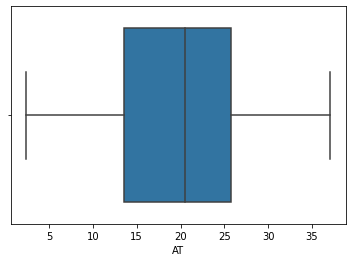

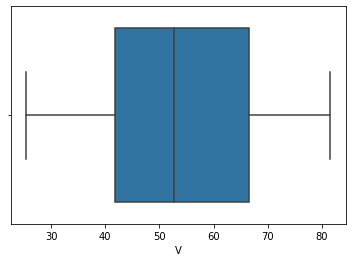

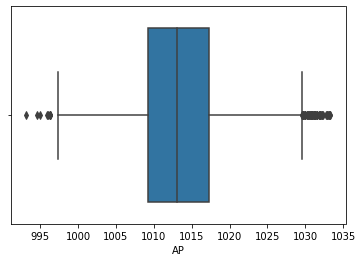

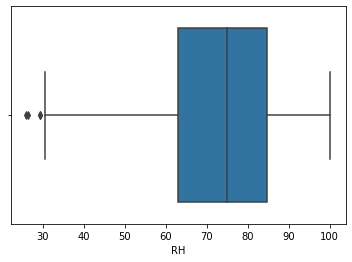

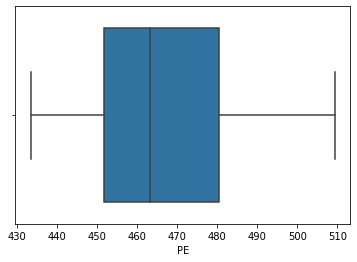

In [4]:
for i in data0:
  sns.boxplot(data0[i])
  plt.show()

**Removing Outliers**

In [5]:
from scipy.stats import zscore

In [6]:
z=np.abs(zscore(data0))
df_new=data0[(z<3).all(axis=1) & (z>-3).all(axis=1)]

In [7]:
data0.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

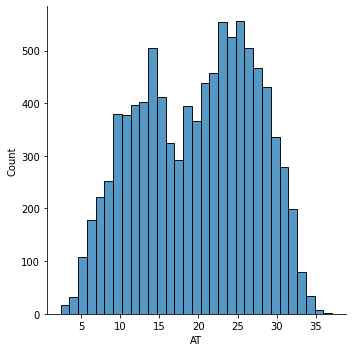

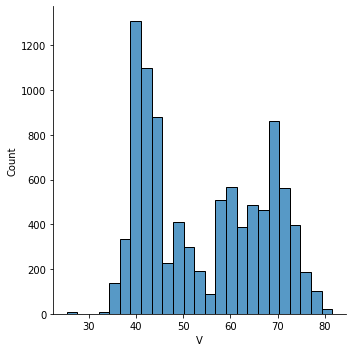

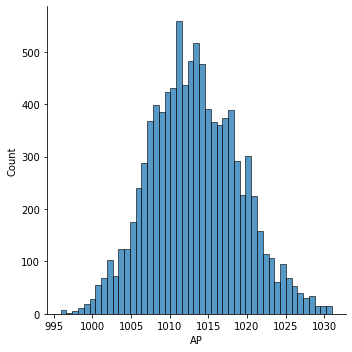

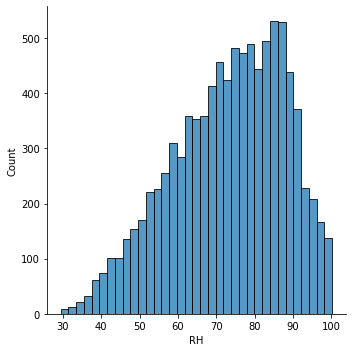

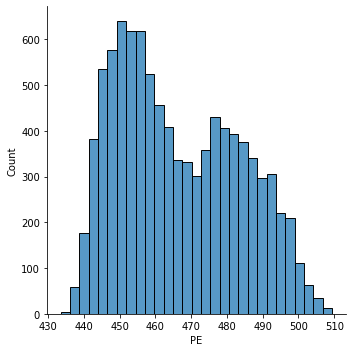

In [8]:
for i in df_new:
  sns.displot(df_new[i])
  plt.plot()

In [9]:
df_new

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.37
1,32.38,67.17,1006.97,60.04,450.86
2,19.29,67.71,1007.94,63.71,460.89
3,16.45,41.48,1016.64,45.21,467.58
4,21.43,46.97,1013.94,61.25,469.81
...,...,...,...,...,...
9563,4.44,38.44,1016.14,75.35,499.62
9564,18.18,67.71,1004.50,87.26,461.13
9565,10.96,45.01,1017.97,95.82,481.25
9566,8.70,36.24,1013.34,89.50,490.93


In [10]:
#data1=np.log(df_new)

In [11]:
x=df_new.drop('PE',axis=1)
Y=df_new['PE']

In [12]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.3,random_state=1)

In [13]:
lazy= LazyRegressor(predictions=True)
models, predictions = lazy.fit(x_train, x_test, Y_train, Y_test)

100%|██████████| 42/42 [00:33<00:00,  1.26it/s]


In [14]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.97,0.97,2.78,1.11
RandomForestRegressor,0.97,0.97,2.92,2.30
XGBRegressor,0.97,0.97,2.97,0.46
BaggingRegressor,0.97,0.97,3.13,0.24
LGBMRegressor,0.96,0.96,3.32,0.14
HistGradientBoostingRegressor,0.96,0.96,3.33,0.45
DecisionTreeRegressor,0.96,0.96,3.60,0.07
KNeighborsRegressor,0.95,0.95,3.74,0.08
ExtraTreeRegressor,0.95,0.95,3.84,0.03


In [15]:
xg=XGBRegressor()
xg.fit(x_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
xg.score(x_test,Y_test)

0.9700306630687905

In [17]:
y_pred=xg.predict(x_test)

In [18]:
preds=pd.DataFrame(Y_test)

In [19]:
preds['predicted_by_model']=y_pred

In [20]:
preds

,PE,predicted_by_model
4487,480.05,482.96
2036,489.71,488.52
7469,451.56,453.25
9106,460.04,471.29
8606,495.53,492.69
...,...,...
7350,487.88,486.43
3447,463.15,457.22
7500,457.90,457.89
4341,468.43,467.28


#Test Data Prediction Of Power Plant

In [21]:
test=pd.read_csv('/content/Test.csv')

In [22]:
test

,AT,V,AP,RH
0,16.98,53.16,1013.95,82.80
1,9.60,41.03,1021.01,69.03
2,6.11,38.68,1017.53,79.23
3,12.34,43.22,1009.28,78.23
4,27.67,59.14,1016.51,61.20
...,...,...,...,...
38267,14.60,53.82,1016.28,64.83
38268,29.67,66.51,1015.60,34.10
38269,20.13,47.03,1012.59,83.03
38270,27.14,70.32,1007.08,73.08


In [23]:
test['PE_by_moel']=xg.predict(test)

In [24]:
test

,AT,V,AP,RH,PE_by_moel
0,16.98,53.16,1013.95,82.80,471.08
1,9.60,41.03,1021.01,69.03,494.45
2,6.11,38.68,1017.53,79.23,497.43
3,12.34,43.22,1009.28,78.23,479.62
4,27.67,59.14,1016.51,61.20,445.86
...,...,...,...,...,...
38267,14.60,53.82,1016.28,64.83,476.60
38268,29.67,66.51,1015.60,34.10,447.87
38269,20.13,47.03,1012.59,83.03,467.56
38270,27.14,70.32,1007.08,73.08,444.53


In [25]:
test_prediction=pd.DataFrame(test)

In [26]:
test_prediction

,AT,V,AP,RH,PE_by_moel
0,16.98,53.16,1013.95,82.80,471.08
1,9.60,41.03,1021.01,69.03,494.45
2,6.11,38.68,1017.53,79.23,497.43
3,12.34,43.22,1009.28,78.23,479.62
4,27.67,59.14,1016.51,61.20,445.86
...,...,...,...,...,...
38267,14.60,53.82,1016.28,64.83,476.60
38268,29.67,66.51,1015.60,34.10,447.87
38269,20.13,47.03,1012.59,83.03,467.56
38270,27.14,70.32,1007.08,73.08,444.53


In [27]:
test_prediction.to_csv('/content/drive/MyDrive/Hackathon/submission_PE.csv', index=False, header=True)

The DIFFICULTY Was Intermediate For this But It was Easy